<a href="https://colab.research.google.com/github/andyreych/BusinessIntelligence/blob/main/Updated_copy_of_Exploratory_Analysis_Banking_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Banking Marketing Campaign Analysis**

#**Problem Statement**



Despite investing a significant amount of resources into marketing campaigns, a banking institution is failing to achieve desired business outcomes, such as increase term deposits subscriptions. It has become increasingly difficult to measure the effectiveness of marketing campaigns, and the bank struggles to identify which channels and messages are resonating with target audiences. There is a need to assess the current marketing strategy, identify gaps and opportunities, and develop data-driven and customer-centric marketing initiatives that can improve business performance.


The objective is to perfom statistics and make figures to find trends, anomalies, patterns or relationships within the data. In other words, the goal is to perform exploratory data analysis to define the target customer who is more likely to subscribe to a term deposit making the marketing campaign more effective. We will start with a general overview of the choosen dataset that can be found [here](https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets), and then gradually narrow to specific areas as we find interesting trends and parts in the data. The findings may be interesting in their own right, or they can be used to select our modeling choices, such as by helping us decide which features to use for futher analysis. 



# **Dataset Information**

The Dataset includes 45211 clients observations in total. The observations are described by 17 attributes, some of which are quantitative linear and some are categorical. We will investigate the factors that could help us predict if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not.

Citation Request: 
This dataset is publicly available for research. It has been picked up from the UCI Machine Learning with random sampling and a few additional columns.

Please add this citation if you use this dataset for any further analysis.

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014




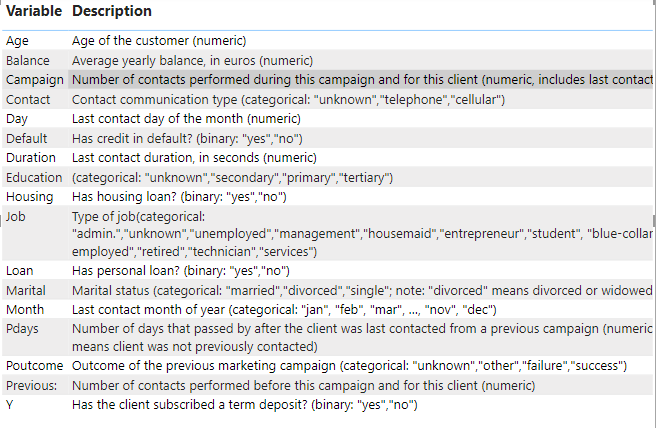

# **1. Hypothesis Generation**
One of the key steps in the data analysis process is developing a hypothesis. This entails comprehending the issue and developing a persuasive hypothesis about what might perhaps have a positive influence on the result. This is done PRIOR to looking at the data, and the result is that we wind up making a long list of the many studies that we might be able to conduct IF data is available.

## Possible hypotheses
Which customers are more likely to subscribe to a term deposit:


1.   Customers who have previously subscribed to a term deposit.
2.   Customers with a balance higher than average.
3.   Customers with no outstanding loans (personal loans and housing loans)
4.   Customers with no defaults in their credit history.
5.   Customers with higher education level.






#**2. Exploratory Data Analysis**
Here, we perform some fundamental data exploration and draw some conclusions about the data. Try to identify some anomalies so that we can address them in the part that follows.

In [1]:
# Import basic libraries
import numpy as np 
import pandas as pd 
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# Create the dataframe
df = pd.read_csv('/content/train.csv', sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
#get the shape of the dataframe
print(df.shape)

(45211, 17)


**Let´s describe the dataset**

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
# see the column data types and non-missing values 
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**As we can see there is no missing values on our data. However, we must change the data type of the following attributes from object to category: Job, Marital, Education, Default, Housing, Loan, Contact, Month, Poutcome.**

In [5]:
#Data Type Conversion
df['job'] = df['job'].astype('category')
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df['default'] = df['default'].astype('category')
df['housing'] = df['housing'].astype('category')
df['loan'] = df['loan'].astype('category')
df['contact'] = df['contact'].astype('category')
df['month'] = df['month'].astype('category')
df['poutcome'] = df['poutcome'].astype('category')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  object  
dtypes: category(9), int64(7), object(1)
memory usage: 3.1+ MB


In [7]:
print(df['y'].value_counts())

no     39922
yes     5289
Name: y, dtype: int64


# ***Univariate Analysis***

###**The goal is to predict if the customer will subscribe or not to a term deposit (y)  , so a reasonable place to start the analysis is to exam the distribution of this variable.**

<Axes: xlabel='y', ylabel='count'>

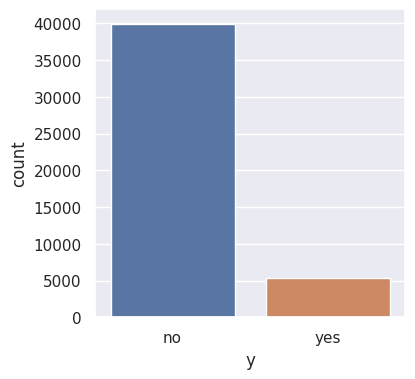

In [8]:
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(x="y", data=df)

In [9]:
#Class Distribution for the target variable
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
#normalization of the target to obtain percentages
df['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

As we can see in the bar graph and in the class distribution, most of the observations in this dataset fall under the "no" class of our binary outcome of y (no = 0 or  yes = 1). In other words, the majority of the clients in this dataset will not subscribe to a term deposit. To be exact we normalized the values of the y class to get the percentages of each class. As a result, we have the following values for each class:

No = 88.30% 
Yes = 11.70%

### **To show the distribution of age of the customers in the dataset, we will plot a histogram using percentages.**

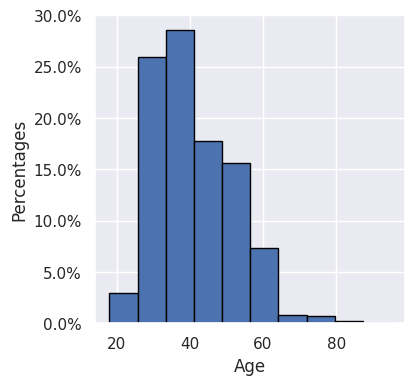

In [11]:
from matplotlib.ticker import PercentFormatter
#create histogram, using percentages instead of counts
plt.hist(df['age'], weights=np.ones(len(df)) / len(df), edgecolor='black')

#apply percentage format to y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Age')
plt.ylabel('Percentages')
plt.show()

From the plot, we can conclude that the majority of the customers are in their 30’s and 40’s, representing over 50% of that population.



### **In addition, we want to explore the distribution of job occupations to better understand the population of our study**

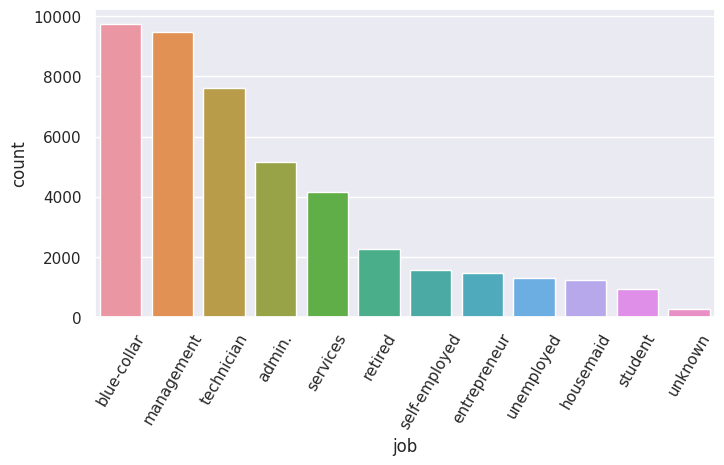

In [12]:
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x="job", data=df, order = df['job'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

In [13]:
#Class Distribution for the job variable
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [14]:
#normalization of the job class to obtain percentages
df['job'].value_counts(normalize=True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

As we can see our top 5 job occupations with their respective percentages in this dataset are the following:

Blue-collar (21.52%)

Management (20.91%)

Technician (16.80%)

Admin (11.43%)

Services (9.18%)


# ***Bi-variate Analysis***

### **We will perform a Bi-variate analysis between the job occupation and the subscription rate.**

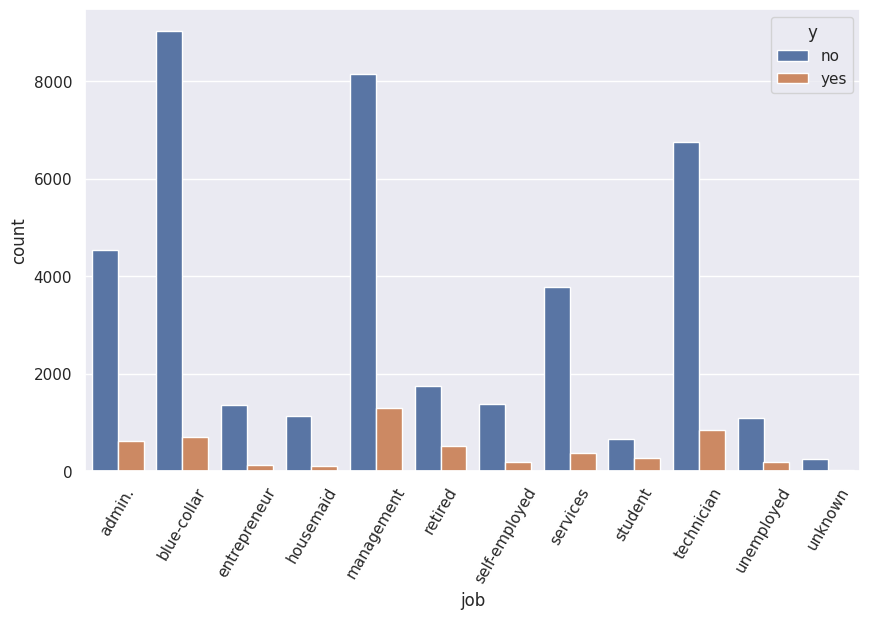

In [15]:
sns.set(rc={'figure.figsize':(10,6)})
bcd = sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=60)
plt.show()

**We display a table with percentages of individuals in each job category
for the outcome**

In [16]:
pd.crosstab(df.y,df.job,normalize='index',margins=True)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,0.113722,0.226041,0.034167,0.028330,0.204323,0.043785,0.034868,0.094810,0.016758,0.169255,0.027579,0.006362
yes,0.119304,0.133863,0.023256,0.020609,0.245982,0.097561,0.035356,0.069767,0.050860,0.158820,0.038192,0.006428
All,0.114375,0.215257,0.032890,0.027427,0.209197,0.050076,0.034925,0.091880,0.020747,0.168034,0.028820,0.006370



As we can see the top 3 job occupations with the highest counts of yes for deposit terms subscriptions  are the following (from highest to lowest): 



1.   Management(24.59%)
2.   Technician(15.88%)
3.   Blue-collar(13.38%)

In addition, the 3 job occupations with the lowest counts of yes for deposit terms subscriptions  are the following (from lowest to highest): 


1.  Unknown (0.64%)
2.  Housemaid (2.06%)
3.  Entrepreneur (2.32%)

Based on the results of our data, marketing purposes should target customers with the following occupations to have a higher probability of success: Management, Technicians, and Blue-collar workers. In addition, the banking institution should reduce  marketing efforts to the following occupations: Unknown, Housemaid, and Entrepreneur. Since a term deposit means that you lock away an amount of money for an agreed 'term' – that means you can not access the money until the term is up, in result, you will get guaranteed rate of interest for the term you select, so you'll know exactly what the return on your money will be. Therefore, targeting clients who are more likely to engage in higher-paying activities and have the capacity to save larger sums of money is essential.


### **Since targeting customers with higher income capacity represents higher probability of success. We calculated the average balance of the customers who have subscribed to a term deposit**

In [17]:
df2=df[['y','balance']]
df2.groupby(['y']).mean()

,balance
y,
no,1303.714969
yes,1804.267915


Based on the calculation above, the customers who subscribed to a term deposit have a higher  average balance than the ones who did not. In addition, the customers who susbscribed to a term deposit also have a higher balance than the average customer in this dataset with a average balance of €1804, whereas the average balance in this dataset is €1362. Based on this information, our hypothesis that the customers who subscribe to term deposits have a higher balance than the average customer is correct. As a result, it is wise to target consumers with average balances of over €1362.

### **We calculate if applicants with higher education level are more likely to subscribed to a term deposit**

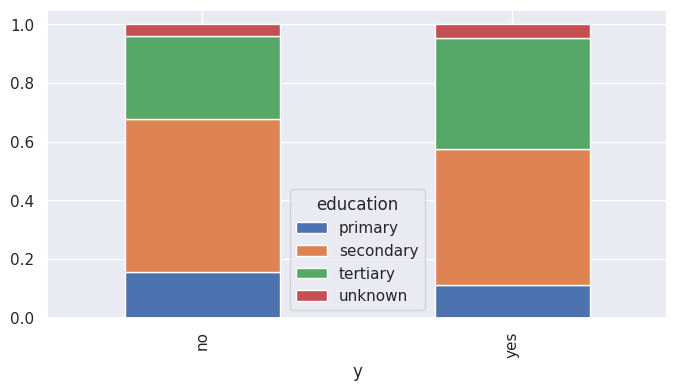

In [18]:
Education = pd.crosstab(df['y'],df['education'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(8,4))
plt.show()

In [19]:
pd.crosstab(df.y,df.education,normalize='index',margins=True)

education,primary,secondary,tertiary,unknown
y,,,,
no,0.156806,0.519814,0.283177,0.040203
yes,0.111741,0.463226,0.377387,0.047646
All,0.151534,0.513194,0.294198,0.041074




Based on the results of our data, our observation shows that the customer with secondary education have the highest subscription rate. Even though the customer segment with the highest level of education is not the one with the highest subscriptions, we can clearly see that the customer with secondary and tertiary level of education represent 84% of successful term deposits subscriptions, whereas unknown and primary represent 16%. Therefore, targeting customers with higher level of education is ideal.

### **We calculate if there is a significantly different subscription rate between people with defaults in their credit history and people without defaults in their credit history.**

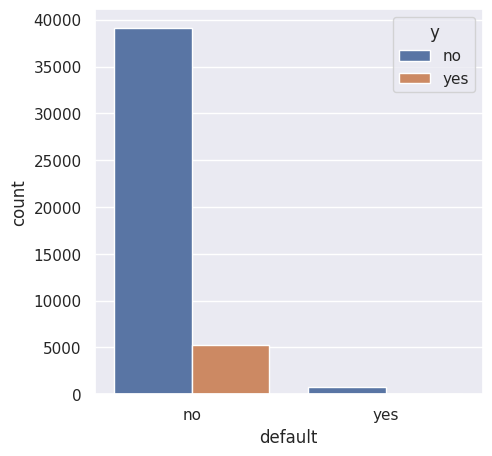

In [20]:
#countplot for each 'default' category separated by the y variable
sns.set(rc={'figure.figsize':(5,5)})
bcd = sns.countplot(x='default', hue='y', data=df)
plt.show()

In [21]:
pd.crosstab(df.y,df.default,normalize='index',margins=True)

default,no,yes
y,,
no,0.980888,0.019112
yes,0.990168,0.009832
All,0.981973,0.018027




According to our data, 99% of the clients who have enrolled to a term deposit has never had a credit default on their credit report. While just 1% of consumers who have defaulted on their credit have signed up for a term deposit. As a result, it is wise to stop running marketing campaigns for clients who have a history of credit defaults.


### **We created a pie chart visualization to show the percentages of the marital status of the customers who have subscribed to a term deposit**

In [28]:
colors = ['steelblue', 'pink', 'silver']
df.groupby(['marital']).sum().plot(kind='pie', y='y', autopct='%1.0f%%', colors=colors, explode=explode)


KeyError: ignored

In [ ]:
pd.crosstab(df.y,df.marital,normalize='index',margins=True)

Based on the above calculation, married customers are more likely to subscribe to a term deposit, followed by single customers and lastly divorced customers. Therefore, it is advisable to reduce marketing campaigns to customers who are divorced.

###**We calculate if there is a significantly different subscription rate between people with personal loans and without personal loans.**

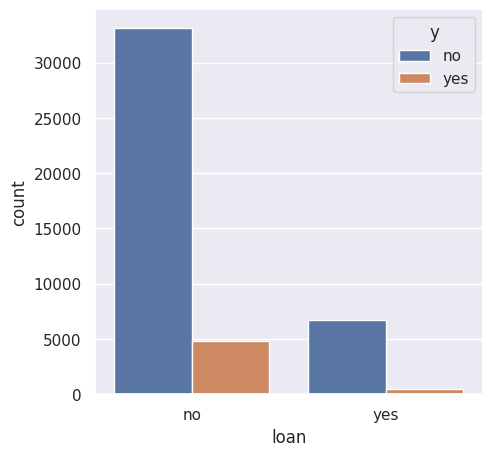

In [25]:
sns.set(rc={'figure.figsize':(5,5)})
bcd = sns.countplot(x='loan', hue='y', data=df)
plt.show()

In [ ]:
df2 = df.groupby(['loan','y']).size().reset_index(name='count') 
print (df2)



Based on the above calculation, people with personal loans, subscription rate is 484/(484+6760)=0.06.However, people without  personal loans , the subscription rate is 4805/(4805+33162)=0.12. Based on this results, the subscription rate of people without loans is twice as larger than people with personal loans. Therefore, marketing purposes should target customers without personal loans to have a higher success of term deposits subscriptions.



### **In addition, we calculate if there is a significant difference between susbcription rate with customers who have housing loans and the ones who do not.**

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
bcd = sns.countplot(x='housing', hue='y', data=df)
plt.show()

In [ ]:
pd.crosstab(df.y,df.housing,normalize='index',margins=True)


According to the results, 63% of the customers who subscribed to a term deposit do not have housing loans. Therefore, our hypothesis in which customers who don´t have outstanding loans ( personal and housing loans) are more likely to subscribe to a term deposit is correct.

### **In order to create a list of correlations we diced to drop the following attributes: Month, Contact,and Day. Since month, contact, and day are not relevant to our dependent variable (y) we have decided to drop this attributes from our dataframe to create the correlations.**

In [ ]:
#drop irrelevant attributes
df=df.drop(['month','contact', 'day'], axis=1)

In [ ]:
#get dummies for categorical variables
bank_df_dummies=pd.get_dummies(df,columns=['job','marital','education','default','housing', 'loan',  'poutcome' ], drop_first=True)

In [ ]:
# Assuming 'df' is the DataFrame containing your data
correlations = bank_df_dummies.drop("y", axis=1).apply(lambda x: x.corr(df.y, method='spearman'))

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

print(sorted_correlations)

Based on the results, the top 3 factors with the highest correlation with a successful outcome are the following:



1.   The duration of the contact.
2.   Previous success on previous marketing campaigns.
3.   Number of contact perfomed on the customer.



The duration of the contact, previous success  of the marketing campaign , and the number of contacts perfomed on the customers are the top factors that have the highest correlation with a successful subscription to a term deposit. In other words, the lengthier the contact, the greater the likelihood of obtaining a new subscription as well as the prior success of the marketings campaign.

# **3. Conclusion**

Based on our analysis on the data,these are the following factors that could help the banking institution create marketing campaigns that reach the target customers with the highest subscription rate to term deposits. 

*   The duration of the contact and the preceding result of the marketing campaign are the two factors with the highest correlation with a successful subscription to a term deposit. Therefore, it is advisable to contact customers with previous success in subscriptions and increase the duration of the contact to increase engagement and improve customer service.
*   Based on the result from the analysis, it is advisable to eliminate marketing efforts towards customers who have defaulted on their credit and that currently hold outstanding loans. This is because none of our customer who have defaulted on their credit have successfully subscribed to a term deposit, and based on our data customers who have outstanding loans are less likely to subscribe to a term deposit. 
*   Based on the data, the occupations with the highest amount of subscriptions are the following: Management, Technician, and Blue-collar.Therefore, marketing campaigns should be focused on these occupations because these occupation have the highest capacity to generate income to grant the highest subscriptions rate, and avoid contacting the occupations such as: Unknown, Housemaid, and Entrepreneur. 